In [707]:
#librerias usaadas
import numpy as np
import pandas as pd

In [708]:
#Recolectar datos de los dataset
figth_data =  pd.read_csv('../fight_data.csv',header=0)
fighter_details =  pd.read_csv('../raw_fighter_details.csv')

In [709]:
pd.set_option('display.max_columns', None)
figth_data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.0,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6002.000000,5121.000000,6004.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.00000,5300.000000,5300.000000,5300.000000,5300.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012

In [710]:
fighter_details.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [711]:
#Calculo de porcentaje de victoria
def x(a,b,c):
    if (a<=0):
        respuesta=0
    else:
        respuesta=(a/(a+b+c))*100
    
    return respuesta

figth_data_R=figth_data.loc[:, ['R_fighter', 'R_wins', 'R_losses','R_draw','date']]
figth_data_B=figth_data.loc[:, ['B_fighter', 'B_wins', 'B_losses','B_draw','date']]

figth_data_R['victoria_%']  = figth_data_R.apply(lambda f: x(f['R_wins']
                                                             ,f['R_losses']
                                                             ,f['R_draw']), axis=1)
figth_data_B['victoria_%']  = figth_data_B.apply(lambda f: x(f['B_wins']
                                                             ,f['B_losses']
                                                             ,f['B_draw']), axis=1)

In [712]:
#borrar columnas de calculo de porcentaje de victoria
figth_data_R=figth_data_R.drop(['R_wins','R_losses','R_draw'], axis=1)
figth_data_B=figth_data_B.drop(['B_wins','B_losses','B_draw'], axis=1)

In [713]:
#tomar el ultimo registro de pelea
figth_data_B=figth_data_B.rename({'B_fighter': 'fighter'}, axis=1)
figth_data_R=figth_data_R.rename({'R_fighter': 'fighter'}, axis=1)
figth_data_B=figth_data_B.sort_values('date').groupby('fighter').tail(1)
figth_data_R=figth_data_R.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data_R.append(figth_data_B, ignore_index=True)
#figth_data=figth_data_B.drop(['date'], axis=1)

In [714]:
figth_data_R.sort_values(by=['fighter'])

,fighter,date,victoria_%
510,Aalon Cruz,2020-02-29,0.000000
3168,Aaron Phillips,2014-08-23,0.000000
3686,Aaron Riley,2013-07-27,37.500000
4267,Aaron Rosa,2011-11-12,0.000000
3954,Aaron Simpson,2012-10-05,70.000000
...,...,...,...
624,Zelim Imadaev,2019-11-09,0.000000
2818,Zhang Lipeng,2015-05-16,66.666667
3936,Zhang Tiequan,2012-11-10,33.333333
493,Zhang Weili,2020-03-07,100.000000


In [715]:
figth_data_B.sort_values(by=['fighter'])

,fighter,date,victoria_%
34,Aalon Cruz,2021-03-06,0.000000
5779,Aaron Brink,2000-11-17,0.000000
375,Aaron Phillips,2020-07-15,0.000000
4315,Aaron Riley,2011-09-24,42.857143
4148,Aaron Rosa,2012-03-02,50.000000
...,...,...,...
284,Zelim Imadaev,2020-09-05,0.000000
89,Zhalgas Zhumagulov,2021-01-23,0.000000
3414,Zhang Lipeng,2014-03-01,0.000000
751,Zhang Weili,2019-08-31,100.000000


In [716]:
figth_data=figth_data.sort_values('date').groupby('fighter').tail(1)
figth_data=figth_data.drop(['date'], axis=1)
figth_data

,fighter,victoria_%
1516,Scott Morris,100.000000
1519,Fred Ettish,0.000000
1520,Ray Wizard,0.000000
1521,Thaddeus Luster,0.000000
1522,Scott Baker,0.000000
...,...,...
1511,Tai Tuivasa,57.142857
1512,Trevin Giles,66.666667
1513,Adrian Yanez,100.000000
1504,Bruno Silva,0.000000


In [717]:
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%
3473,Aalon Cruz,0.000000
1654,Aaron Brink,0.000000
3182,Aaron Phillips,0.000000
400,Aaron Riley,37.500000
2118,Aaron Rosa,50.000000
...,...,...
3419,Zhalgas Zhumagulov,0.000000
564,Zhang Lipeng,66.666667
356,Zhang Tiequan,33.333333
1149,Zhang Weili,100.000000


In [718]:
figth_data['binning']=pd.qcut(figth_data['victoria_%'], 2, labels=[0,1])

In [719]:
figth_data.sort_values(by=['fighter'])

,fighter,victoria_%,binning
3473,Aalon Cruz,0.000000,0
1654,Aaron Brink,0.000000,0
3182,Aaron Phillips,0.000000,0
400,Aaron Riley,37.500000,0
2118,Aaron Rosa,50.000000,1
...,...,...,...
3419,Zhalgas Zhumagulov,0.000000,0
564,Zhang Lipeng,66.666667,1
356,Zhang Tiequan,33.333333,0
1149,Zhang Weili,100.000000,1


In [720]:
figth_data['binning'].value_counts()

0    1093
1    1046
Name: binning, dtype: int64

In [721]:
#redondeo victoria
figth_data['victoria_%']=np.around(figth_data['victoria_%'], 0)  
figth_data['victoria_%'].apply(np.round)
figth_data = figth_data.astype({"victoria_%": int})

In [722]:
#unir tablas
fight_inner = pd.merge(left=figth_data, right=fighter_details
                       ,how='inner', left_on='fighter', right_on='fighter_name')

In [723]:
fight_inner

,fighter,victoria_%,binning,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,Scott Morris,"5' 10""",210 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,Fred Ettish,"6' 0""",180 lbs.,NaN,Southpaw,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,Ray Wizard,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,Thaddeus Luster,"6' 3""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,Scott Baker,"6' 0""",210 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,Tai Tuivasa,"6' 2""",264 lbs.,"75""",Southpaw,"Mar 16, 1993",4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,Trevin Giles,"6' 0""",185 lbs.,"74""",Orthodox,"Aug 06, 1992",3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,Adrian Yanez,"5' 7""",135 lbs.,"70""",Orthodox,"Nov 29, 1993",4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,Bruno Silva,"6' 0""",185 lbs.,NaN,NaN,"Jul 13, 1989",0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [724]:
for (label, content) in fight_inner.iteritems():
    print('Nombre de la columna: ', label)
    print(fight_inner[label].isnull().sum())

Nombre de la columna:  fighter
0
Nombre de la columna:  victoria_%
0
Nombre de la columna:  binning
0
Nombre de la columna:  fighter_name
0
Nombre de la columna:  Height
13
Nombre de la columna:  Weight
10
Nombre de la columna:  Reach
649
Nombre de la columna:  Stance
75
Nombre de la columna:  DOB
141
Nombre de la columna:  SLpM
0
Nombre de la columna:  Str_Acc
0
Nombre de la columna:  SApM
0
Nombre de la columna:  Str_Def
0
Nombre de la columna:  TD_Avg
0
Nombre de la columna:  TD_Acc
0
Nombre de la columna:  TD_Def
0
Nombre de la columna:  Sub_Avg
0


In [725]:
#df = pd.get_dummies(df, columns=['type'])
fight_inner=fight_inner.drop(['Reach','DOB','fighter_name'], axis=1)
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,"5' 10""",210 lbs.,Orthodox,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Fred Ettish,0,0,"6' 0""",180 lbs.,Southpaw,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Ray Wizard,0,0,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3,Thaddeus Luster,0,0,"6' 3""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Scott Baker,0,0,"6' 0""",210 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,"6' 2""",264 lbs.,Southpaw,4.38,50%,3.44,50%,0.00,0%,46%,0.0
2135,Trevin Giles,67,1,"6' 0""",185 lbs.,Orthodox,3.26,56%,1.88,62%,1.37,80%,79%,0.3
2136,Adrian Yanez,100,1,"5' 7""",135 lbs.,Orthodox,4.69,44%,2.31,55%,0.00,0%,100%,0.0
2137,Bruno Silva,0,0,"6' 0""",185 lbs.,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0


In [726]:
fight_inner['Height']

0       5' 10"
1        6' 0"
2          NaN
3        6' 3"
4        6' 0"
         ...  
2134     6' 2"
2135     6' 0"
2136     5' 7"
2137     6' 0"
2138     5' 5"
Name: Height, Length: 2139, dtype: object

In [727]:
def convporcentaje(a):
    for i in range(len(fight_inner)):
    
        if ((pd.isnull(fight_inner.iloc[i][a]))):
            print('')
        else:
            fight_inner.iloc[i, fight_inner.columns.get_loc(a)]=(int(fight_inner.iloc[i][a].split("%")[0]))


for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Height']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Height')]=math.floor(
            (int(fight_inner.iloc[i]['Height'].split("' ")[0])*30.48 
             + int(fight_inner.iloc[i]['Height'].split(" ")[1].split('"')[0])*2.54))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Weight']))):
        print('')
    else:
        fight_inner.iloc[i, fight_inner.columns.get_loc('Weight')]=(int(fight_inner.iloc[i]['Weight'].split(" ")[0]))
        
for i in range(len(fight_inner)):
    
    if ((pd.isnull(fight_inner.iloc[i]['Stance']))):
        fight_inner.iloc[i, fight_inner.columns.get_loc('Stance')]=('Orthodox')

        
        
convporcentaje('Str_Acc')
convporcentaje('Str_Def')
convporcentaje('TD_Acc')
convporcentaje('TD_Def')

In [728]:
fight_inner

,fighter,victoria_%,binning,Height,Weight,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Scott Morris,100,1,177,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
1,Fred Ettish,0,0,182,180,Southpaw,0.00,0,0.00,0,0.00,0,0,0.0
2,Ray Wizard,0,0,NaN,NaN,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
3,Thaddeus Luster,0,0,190,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
4,Scott Baker,0,0,182,210,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,187,264,Southpaw,4.38,50,3.44,50,0.00,0,46,0.0
2135,Trevin Giles,67,1,182,185,Orthodox,3.26,56,1.88,62,1.37,80,79,0.3
2136,Adrian Yanez,100,1,170,135,Orthodox,4.69,44,2.31,55,0.00,0,100,0.0
2137,Bruno Silva,0,0,182,185,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0


In [729]:
print(fight_inner['Height'].isnull().sum())

13


In [730]:
fight_inner=fight_inner.rename({'Str_Acc': 'Str_Acc_%',
                                  'Str_Def': 'Str_Def_%',
                                  'TD_Acc': 'TD_Acc_%',
                                  'TD_Def': 'TD_Def_%'}, axis=1)
fight_inner = pd.get_dummies(fight_inner, columns=['Stance'])
fight_inner=fight_inner.drop(['Stance_Switch','Stance_Open Stance','Stance_Sideways'], axis=1)

fight_inner = fight_inner[fight_inner['Height'].notna()]
fight_inner = fight_inner[fight_inner['Weight'].notna()]
fight_inner

,fighter,victoria_%,binning,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw
0,Scott Morris,100,1,177,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
1,Fred Ettish,0,0,182,180,0.00,0,0.00,0,0.00,0,0,0.0,0,1
3,Thaddeus Luster,0,0,190,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
4,Scott Baker,0,0,182,210,0.00,0,0.00,0,0.00,0,0,0.0,1,0
5,Alberta Cerra Leon,0,0,172,238,0.00,0,0.00,0,0.00,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,Tai Tuivasa,57,1,187,264,4.38,50,3.44,50,0.00,0,46,0.0,0,1
2135,Trevin Giles,67,1,182,185,3.26,56,1.88,62,1.37,80,79,0.3,1,0
2136,Adrian Yanez,100,1,170,135,4.69,44,2.31,55,0.00,0,100,0.0,1,0
2137,Bruno Silva,0,0,182,185,0.00,0,0.00,0,0.00,0,0,0.0,1,0


In [731]:
X=fight_inner.iloc[:, 3:]
y=fight_inner.iloc[:, 2]

Best value of each hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Ensemble(random forest) accuracy score:  74.61 %


[Text(407.29017857142856, 509.625, 'X[8] <= 33.5\ngini = 0.5\nsamples = 936\nvalue = [743, 745]'),
 Text(217.16281512605042, 441.675, 'X[3] <= 38.5\ngini = 0.34\nsamples = 283\nvalue = [342, 95]'),
 Text(120.45063025210084, 373.725, 'X[5] <= 56.5\ngini = 0.249\nsamples = 152\nvalue = [199, 34]'),
 Text(72.09453781512605, 305.775, 'X[5] <= 36.5\ngini = 0.231\nsamples = 131\nvalue = [176, 27]'),
 Text(35.168067226890756, 237.825, 'X[9] <= 2.0\ngini = 0.283\nsamples = 81\nvalue = [102, 21]'),
 Text(21.100840336134453, 169.875, 'X[3] <= 7.5\ngini = 0.25\nsamples = 76\nvalue = [99, 17]'),
 Text(14.067226890756302, 101.92500000000001, 'X[4] <= 1.565\ngini = 0.269\nsamples = 70\nvalue = [89, 17]'),
 Text(7.033613445378151, 33.97500000000002, 'gini = 0.278\nsamples = 67\nvalue = [85, 17]'),
 Text(21.100840336134453, 33.97500000000002, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(28.134453781512605, 101.92500000000001, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]'),
 Text(49.23529411764706, 1

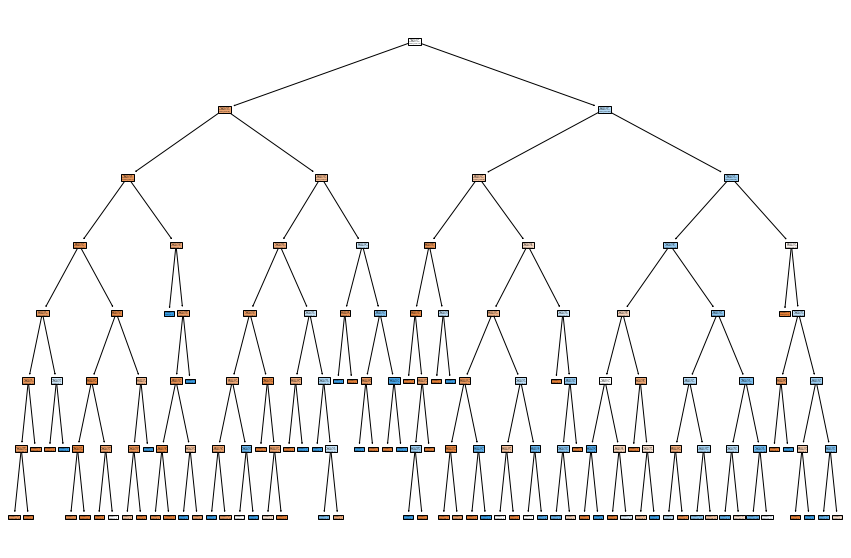

In [732]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz

from subprocess import call
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=2)


parameters = [{
                'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
              }]

# parameters = [{'criterion':['gini', 'entropy'],
#                'max_depth':[20,40,50],
#                'max_features': [5, 6,,7],
#                "min_samples_split": range(1,100),
#                 "min_samples_leaf": range(1,30)}]

kf = KFold(n_splits=3,shuffle=True,random_state=2)
rfc=RandomForestClassifier(random_state=2)
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train, y_train)

model = RandomForestClassifier(random_state=2)

randomforest_model = RandomForestClassifier(n_estimators=100,
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'])
randomforest_model.fit(x_train, y_train)
randomforest_score_kfold = randomforest_model.score(x_test, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

plt.figure(figsize=(15,10))
tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [733]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
np.round(x_train.describe(), 1)

,SLpM,SApM,TD_Avg,Sub_Avg,Stance_Orthodox,Stance_Southpaw
count,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0
mean,2.8,3.3,1.4,0.7,0.8,0.2
std,1.7,2.0,1.5,1.2,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.7,2.2,0.0,0.0,1.0,0.0
50%,2.7,3.1,1.0,0.3,1.0,0.0
75%,3.7,4.1,2.0,0.9,1.0,0.0
max,19.9,23.3,14.2,21.9,1.0,1.0


In [734]:
np.round(x_train_scaled.describe(), 1)

,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw
count,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0,1488.0
mean,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-1.4,-1.7,-2.6,-1.6,-2.9,-0.9,-1.2,-1.6,-0.5,-1.9,-0.5
25%,-0.7,-0.7,-0.7,-0.3,-0.5,-0.3,-0.9,-1.2,-0.7,-0.5,0.5,-0.5
50%,0.2,-0.1,-0.0,0.1,-0.1,0.2,-0.3,0.0,0.2,-0.3,0.5,-0.5
75%,0.8,0.3,0.6,0.6,0.4,0.6,0.4,0.7,0.7,0.2,0.5,-0.5
max,3.4,14.6,10.3,3.9,10.2,3.0,8.4,2.6,1.7,17.2,0.5,2.2


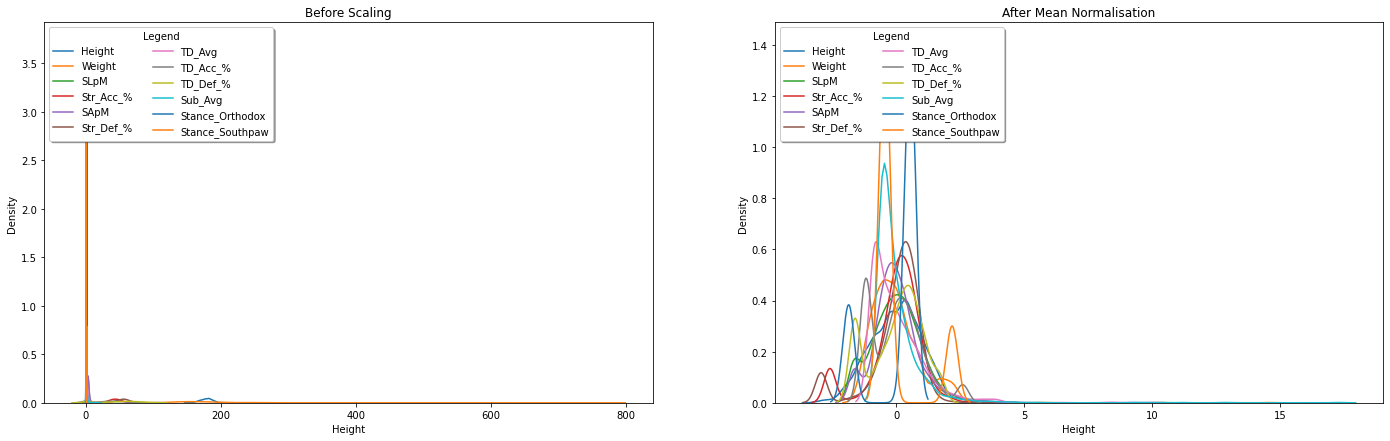

In [735]:
def plotStandarization():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

    for (label, content) in x_train.iteritems():
        ax1.set_title('Before Scaling')
        sns.kdeplot(x_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in x_train_scaled.iteritems():
        ax2.set_title('After Mean Normalisation')
        sns.kdeplot(x_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)

    plt.show() 
    
plotStandarization()

Best value of each hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Ensemble(random forest) accuracy score:  75.39 %


[Text(394.4909048507463, 509.625, 'X[6] <= -0.792\ngini = 0.5\nsamples = 934\nvalue = [747, 741]'),
 Text(216.66744402985074, 441.675, 'X[0] <= 0.884\ngini = 0.349\nsamples = 275\nvalue = [333, 97]'),
 Text(132.7332089552239, 373.725, 'X[9] <= -0.459\ngini = 0.31\nsamples = 208\nvalue = [266, 63]'),
 Text(87.44776119402985, 305.775, 'X[2] <= 0.927\ngini = 0.285\nsamples = 164\nvalue = [217, 45]'),
 Text(49.97014925373134, 237.825, 'X[4] <= 0.381\ngini = 0.203\nsamples = 135\nvalue = [193, 25]'),
 Text(24.98507462686567, 169.875, 'X[0] <= -0.536\ngini = 0.263\nsamples = 90\nvalue = [119, 22]'),
 Text(12.492537313432836, 101.92500000000001, 'X[4] <= -1.48\ngini = 0.061\nsamples = 21\nvalue = [31, 1]'),
 Text(6.246268656716418, 33.97500000000002, 'gini = 0.245\nsamples = 6\nvalue = [6, 1]'),
 Text(18.738805970149254, 33.97500000000002, 'gini = 0.0\nsamples = 15\nvalue = [25, 0]'),
 Text(37.47761194029851, 101.92500000000001, 'X[2] <= 0.289\ngini = 0.311\nsamples = 69\nvalue = [88, 21]'),


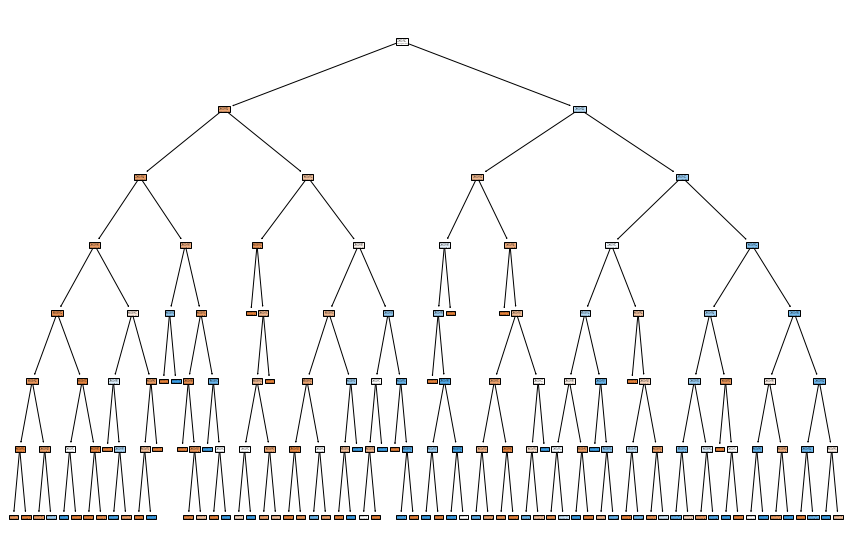

In [736]:
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = kf, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

model = RandomForestClassifier(random_state=0)

randomforest_model = RandomForestClassifier(n_estimators=100,
                                            criterion = grid.best_params_['criterion'],
                                            max_depth = grid.best_params_['max_depth'])
randomforest_model.fit(x_train_scaled, y_train)
randomforest_score_kfold = randomforest_model.score(x_test_scaled, y_test)

print("Best value of each hyperparameters: {}".format(grid.best_params_))
print("Ensemble(random forest) accuracy score: ", round(randomforest_score_kfold*100,2), "%")

plt.figure(figsize=(15,10))
tree.plot_tree(randomforest_model.estimators_[1], filled=True)

In [737]:
x_train_scaled

,Height,Weight,SLpM,Str_Acc_%,SApM,Str_Def_%,TD_Avg,TD_Acc_%,TD_Def_%,Sub_Avg,Stance_Orthodox,Stance_Southpaw
0,1.338705,1.701119,0.749360,0.467941,-0.904832,0.993640,-0.670716,2.588125,1.296734,-0.540259,0.535908,-0.460137
1,0.770570,2.505756,-1.668146,-2.597721,-1.649219,-2.942445,-0.886590,-1.200306,-1.620533,-0.540259,0.535908,-0.460137
2,0.770570,0.798951,0.105894,0.207034,0.381389,0.158713,0.382488,1.489480,0.037005,0.434368,0.535908,-0.460137
3,0.770570,-0.664025,0.358470,0.272261,-0.281977,0.039438,-0.271676,-0.253199,-1.123272,0.515587,0.535908,-0.460137
4,1.338705,2.140012,1.897976,-0.184327,-0.195891,0.397264,-0.415592,-0.253199,1.363036,-0.540259,0.535908,-0.460137
...,...,...,...,...,...,...,...,...,...,...,...,...
1483,-0.365698,-0.420196,-0.032421,-0.119100,-0.601000,0.993640,-0.566050,0.049876,0.269060,-0.134164,-1.865992,-0.460137
1484,-0.138445,-0.420196,-0.814201,-0.445235,-0.499723,0.576177,0.218947,-0.177430,-0.725463,0.515587,0.535908,-0.460137
1485,0.770570,-0.054452,0.141977,0.141807,-0.261721,0.277988,1.409526,0.693909,1.329885,-0.134164,-1.865992,2.173264
1486,1.906839,0.311292,-0.236886,0.728849,-0.119933,-0.556939,0.990861,1.224290,0.567417,0.271931,0.535908,-0.460137
